# 한글 자연어 처리 기초 

- 참고자료: 파이썬으로 데이터 주무르기(민형기) 

이번 주에는 한글 자연어 처리 기초에 대해 배워볼겁니다! 자연어 처리란 인간의 언어를 컴퓨터 언어로 바꿔주는 작업이라고 생각하면 쉬워요. 자연어 처리를 배우면 한글로 된 여러 자료들을 컴퓨터로 작업할 수 있어서 할 수 있는 것들이 엄청 많아진답니다! 재미있겠죠? 🧐

이번주는 두가지 교안이 제공됩니다. 하나는 한글 자연어 처리 기초 방법론에 관한 내용으로 기본적인 모듈과 개념을 학습할거에요. 두 번째 교안은 청와대 청원 사이트에서 청원 목록, 내용을 크롤링해와 자연어 처리를 하고 WordCloud 시각화하는 내용을 담고있습니다. 마지막 주차 내용인만큼 정말 알차게 담았으니 열심히 해보시면 크게 도움이 될거에요.

이번 주차 학습은 구글 Colab을 기반으로 쓰여졌습니다. 깔아야 하는 모듈도 많은데, 로컬 컴퓨터에서 깔기가 너어어어무 힘들어요😢 jupyter notebook으로 깔아보시다가(교재 285쪽~) 안되면 너무 고생하지 마시고 콜랩으로 하시길 강력추천드립니다. 여기 콜랩의 맨 왼쪽에 세번째 아이콘 폴더 사진이 보이시죠? 눌러보시면 파일이라는 한글이 뜨면서 아리 디스크 .GB 사용 가능이라고 적혀져 있는 창이 뜰겁니다. 여기에 업로드 하고 싶은 파일을 드래그 하여 넣으면 손쉽게 파일을 불러올 수 있습니다. (잘 이해가 가지 않는다면, 슬랙으로 질문해주세요❤️)

colab에서 matplotlib은 한글을 지원 안 해줍니다... 한글을 실행하기 위해선 아래 코드를 실행하고 런타임 다시 실행하기를 눌러주세요. 이거 안 하고 넘어가면 나중에 큰 후회를 할 것입니다. 이번에 실행해야 하는 코드가 꽤 많은데 런타임 다시 시작을 둘러러야 한다? 정말정말 힘들고 귀찮아집니다. 어떻게 아냐고요? 저도 알고 싶지 않았습니다...^--^

다시 한 번 알려드리자면

__실행 후 런타임 > 런타임 다시 시작 > 이후 셀 실행__ 을 해주셔야 제대로 한글이 출력됩니다. 처음 아래 코드를 실행하기만 하면 깔리기만 한 것이라 다시 새로 런타임을 다시 시작해주셔야 정상적으로 출력이 가능해요


In [2]:
# 한글 폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


### Colab에서 필요한 모듈 설치하기

복붙하셔서 그대로 사용하시면 됩니다. Jupyter notebook으로 진행하실 경우 교재를 참고하셔서 필요한 모듈들을 다운로드하면 됩니다. (오늘 두 개의 교안 길이가 상당한데요. 출력값이 워낙 길어서 그런거니 너무 부담갖지 않으셔도 됩니다. 아마도요 ㅎㅎ)

In [3]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [1,929 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease


## 꼬꼬마 모듈 사용하기

꼬꼬마를 사용해서 한글 자연어 처리를 해보겠습니다.

In [4]:
from konlpy.tag import Kkma 
kkma = Kkma()

In [5]:
# 문장 분석
kkma.sentences('코사다마의 한글 자연어 처리를 시작합니다 재미있어요~~')

['코 사다 마의 한글 자연어 처리를 시작합니다', '재미있어요~~']

In [6]:
# 명사 분석
kkma.nouns('코사다마의 한글 자연어 처리를 시작합니다 재미있어요~~')

['코', '마의', '한글', '자연어', '처리']

In [7]:
# 형태소 분석
kkma.pos('코사다마의 한글 자연어 처리를 시작합니다 재미있어요~~')

[('코', 'NNG'),
 ('사', 'VV'),
 ('다', 'ECS'),
 ('마의', 'NNG'),
 ('한글', 'NNG'),
 ('자연어', 'NNG'),
 ('처리', 'NNG'),
 ('를', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('재미있', 'VA'),
 ('어요', 'EFN'),
 ('~~', 'SW')]

꼬꼬마 모듈은 코사다마를 잘 인식하지 못하네요. 다른 모듈로 한글 자연어 처리를 해보겠습니다.

## 한나눔 모듈 사용하기

In [8]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

In [9]:
# 명사 분석
hannanum.nouns('코사다마의 한글 자연어 처리를 시작합니다 재미있어요~~~')

['코사다마', '한글', '자연어', '처리', '시작']

In [10]:
# 형태소 분석
hannanum.morphs('코사다마의 한글 자연어 처리를 시작합니다 재미있어요~~~')

['코사다마', '의', '한글', '자연어', '처리', '를', '시작', '하', 'ㅂ니다', '재미있', '어요', '~~~']

In [11]:
# 형태소 태깅 
hannanum.pos('코사다마의 한글 자연어 처리를 시작합니다 재미있어요~~~')

[('코사다마', 'N'),
 ('의', 'J'),
 ('한글', 'N'),
 ('자연어', 'N'),
 ('처리', 'N'),
 ('를', 'J'),
 ('시작', 'N'),
 ('하', 'X'),
 ('ㅂ니다', 'E'),
 ('재미있', 'P'),
 ('어요', 'E'),
 ('~~~', 'S')]

이전 꼬꼬마 보다 자연어 처리가 더 깔끔하게 이루어지는 것 같습니다.

## OKT 모듈 사용하기

이전에는 모듈명이 Twitter였는데 지금은 Okt 모듈로 바뀌었다고 하네요.

In [12]:
from konlpy.tag import Okt
okt = Okt()

In [13]:
# 명사 분석
okt.nouns('코사다마의 한글 자연어 처리를 시작합니다 재미있어요~~~')

['코', '다마', '한글', '자연어', '처리', '시작']

In [14]:
# 형태소 분석
okt.morphs('코사다마의 한글 자연어 처리를 시작합니다 재미있어요~~~')

['코', '사', '다마', '의', '한글', '자연어', '처리', '를', '시작', '합니다', '재미있어요', '~~~']

In [15]:
# 형태소 분석에 태깅까지
okt.pos('코사다마의 한글 자연어 처리를 시작합니다 재미있어요~~~')

[('코', 'Noun'),
 ('사', 'Modifier'),
 ('다마', 'Noun'),
 ('의', 'Josa'),
 ('한글', 'Noun'),
 ('자연어', 'Noun'),
 ('처리', 'Noun'),
 ('를', 'Josa'),
 ('시작', 'Noun'),
 ('합니다', 'Verb'),
 ('재미있어요', 'Adjective'),
 ('~~~', 'Punctuation')]

가장 자연스럽게 자연어 처리를 해줄 수 있는 모듈은 이 문장을 기준으로 봤을 때 okt인 것 같습니다.

## WordCloud 워드 클라우드

워드 클라우드라는 시각화를 해볼 것인데요, 가장 많은 빈도가 나오는 단어를 크기별로 시각화해주는 것을 워드 클라우드라고 합니다. 아마 예시를 보면 여러분들이 한 번쯤은 인터넷에서 봤을겁니다. 3가지 예시를 통해서 워드 클라우드를 학습해보아요!

In [16]:
!pip install wordcloud

### Alice 소설 시각화

In [17]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np 
from PIL import Image

In [20]:
# 앨리스 텍스트와 그림 불러오기
text = open('07. alice.txt').read()
alice_mask = np.array(Image.open('07. alice_mask.png'))

### 불용어 Stopwords

유의미한 단어 토큰만을 선별하기 위해서 큰 의미가 없는 단어 토클을 제거하는 작업입니다. 예를 들어, I, my, me, over, 조사, 접미사 같은 단어들은 자주 등장하나 실제 의미 분석에 기여하는 바가 거의 없고, 이를 불용어라고 불러요.

[더 알아보기](https://medium.com/@omicro03/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-nlp-5%EC%9D%BC%EC%B0%A8-%EB%B6%88%EC%9A%A9%EC%96%B4-277694095a6f)

후에도 불용어 작업을 계속하겠지만 이게 생각보다 매우 귀찮은 작업니다 ^^ 영어 불용어는 모듈 자체에 내장되어 있지만, 한극은 직접 불용어를 입력해줘야 하거든요... ㅎㅎㅎㅎ

In [21]:
stopwords = set(STOPWORDS)

# 앨리스 소설에 said가 많이 등장해서 불용어 처리
stopwords.add("said")

워드 클라우드 자체에서 단어 횟수를 세는 기능을 제공합니다. 이를 이용해서 최빈 단어를 찾을거에요.

In [22]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

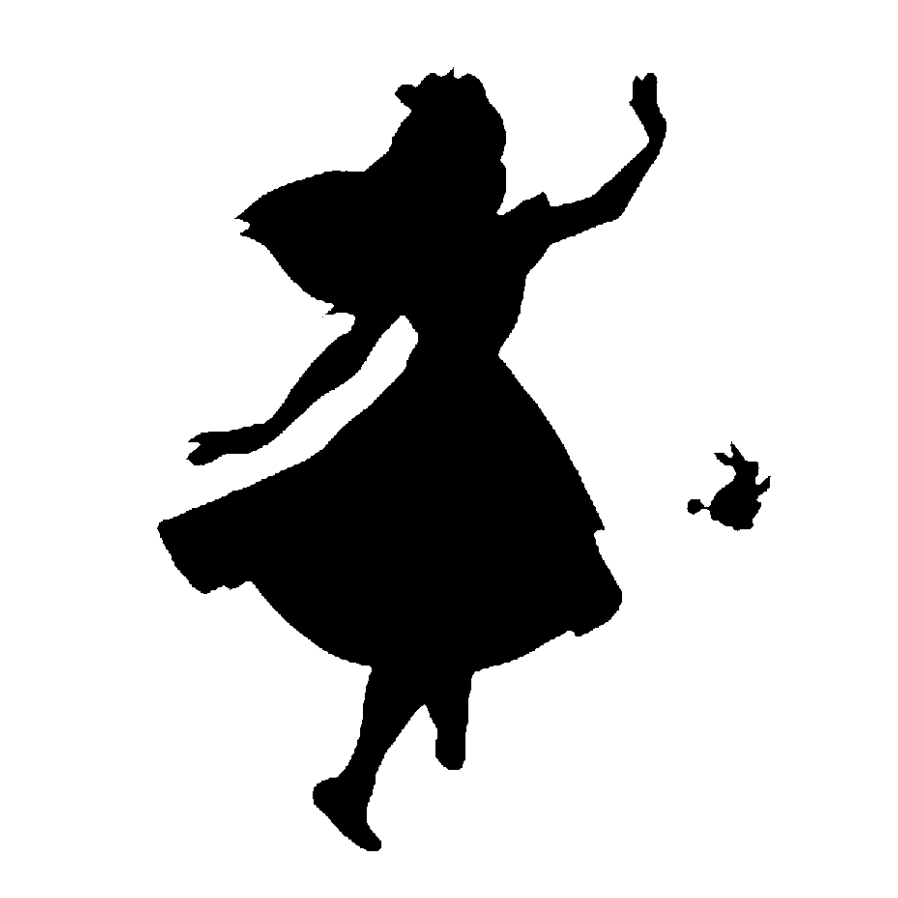

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

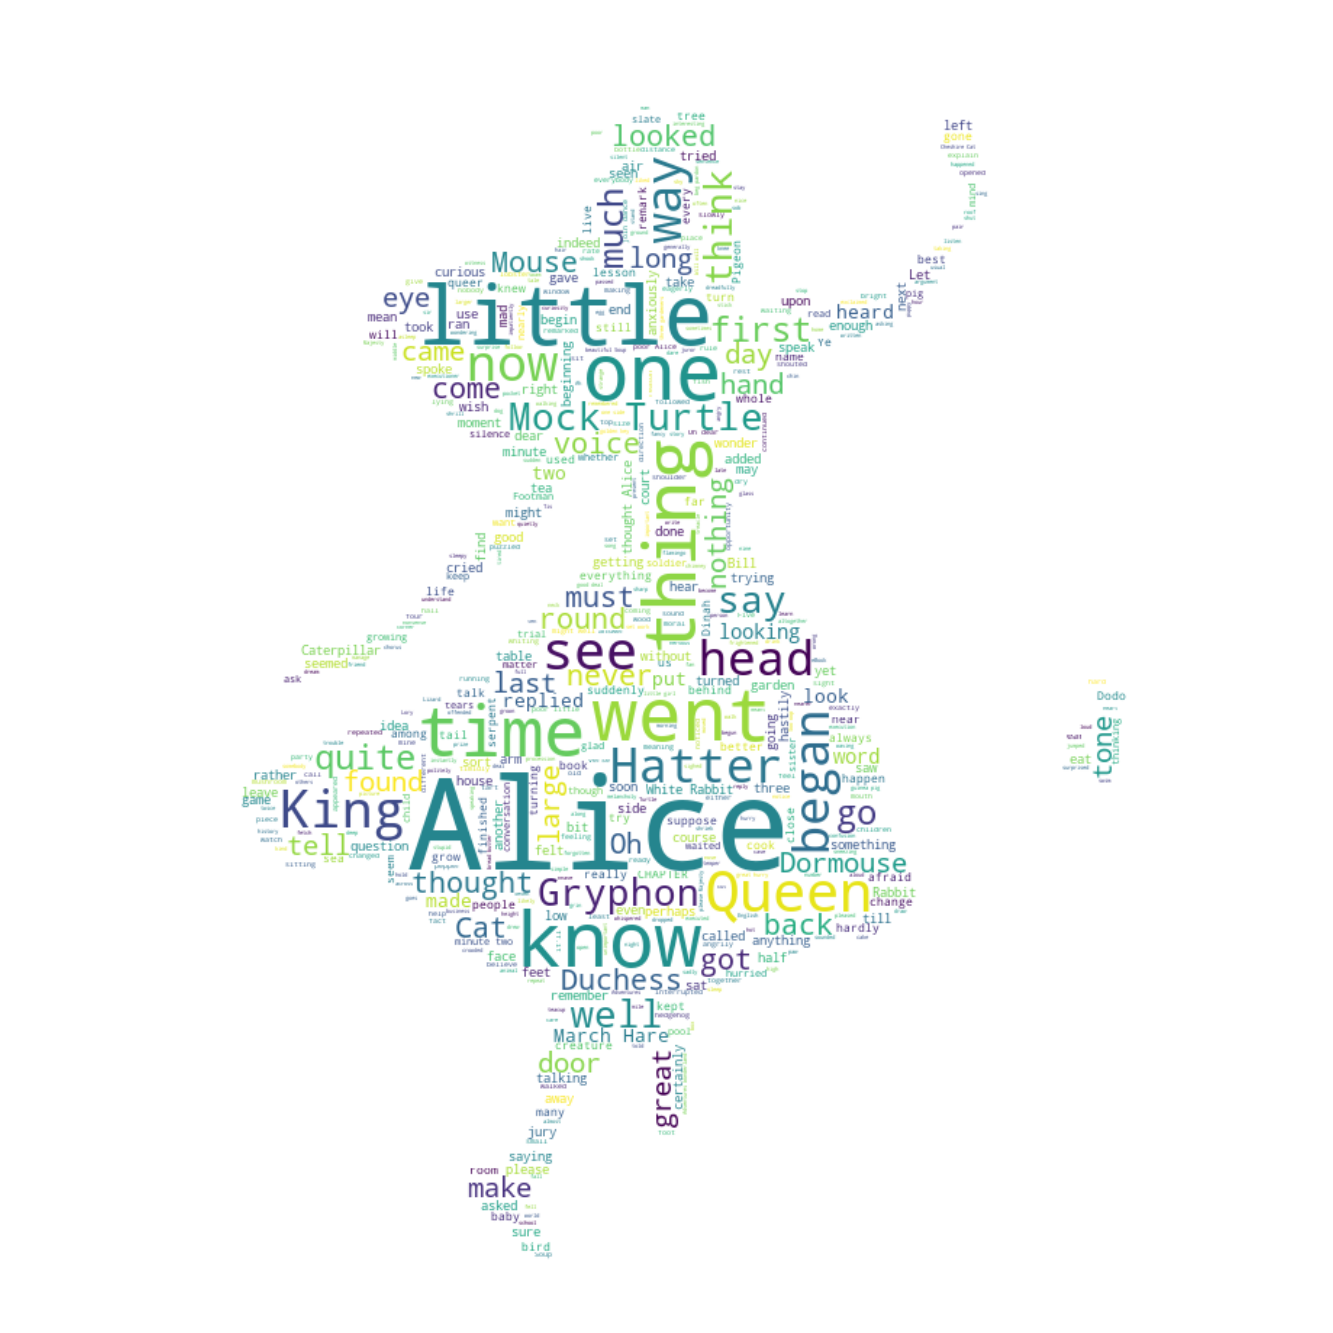

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
# imshow하는 것은 wc (wordcloud모듈을 활용해 생성한 객체)
plt.axis('off')
plt.show()

### 스타워즈의 A New Hope 텍스트 시각화

In [25]:
text = open('07. a_new_hope.txt').read()

# 왼쪽 단어를 오른쪽으로 변경 
text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('07. stormtrooper_mask.png'))

In [26]:
# 불용어 처리 
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [27]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords,
               margin=10, random_state=1).generate(text)
default_colors = wc.to_array()

In [28]:
# 텍스트 색 회색으로 채우는 함수
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs): 
                    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

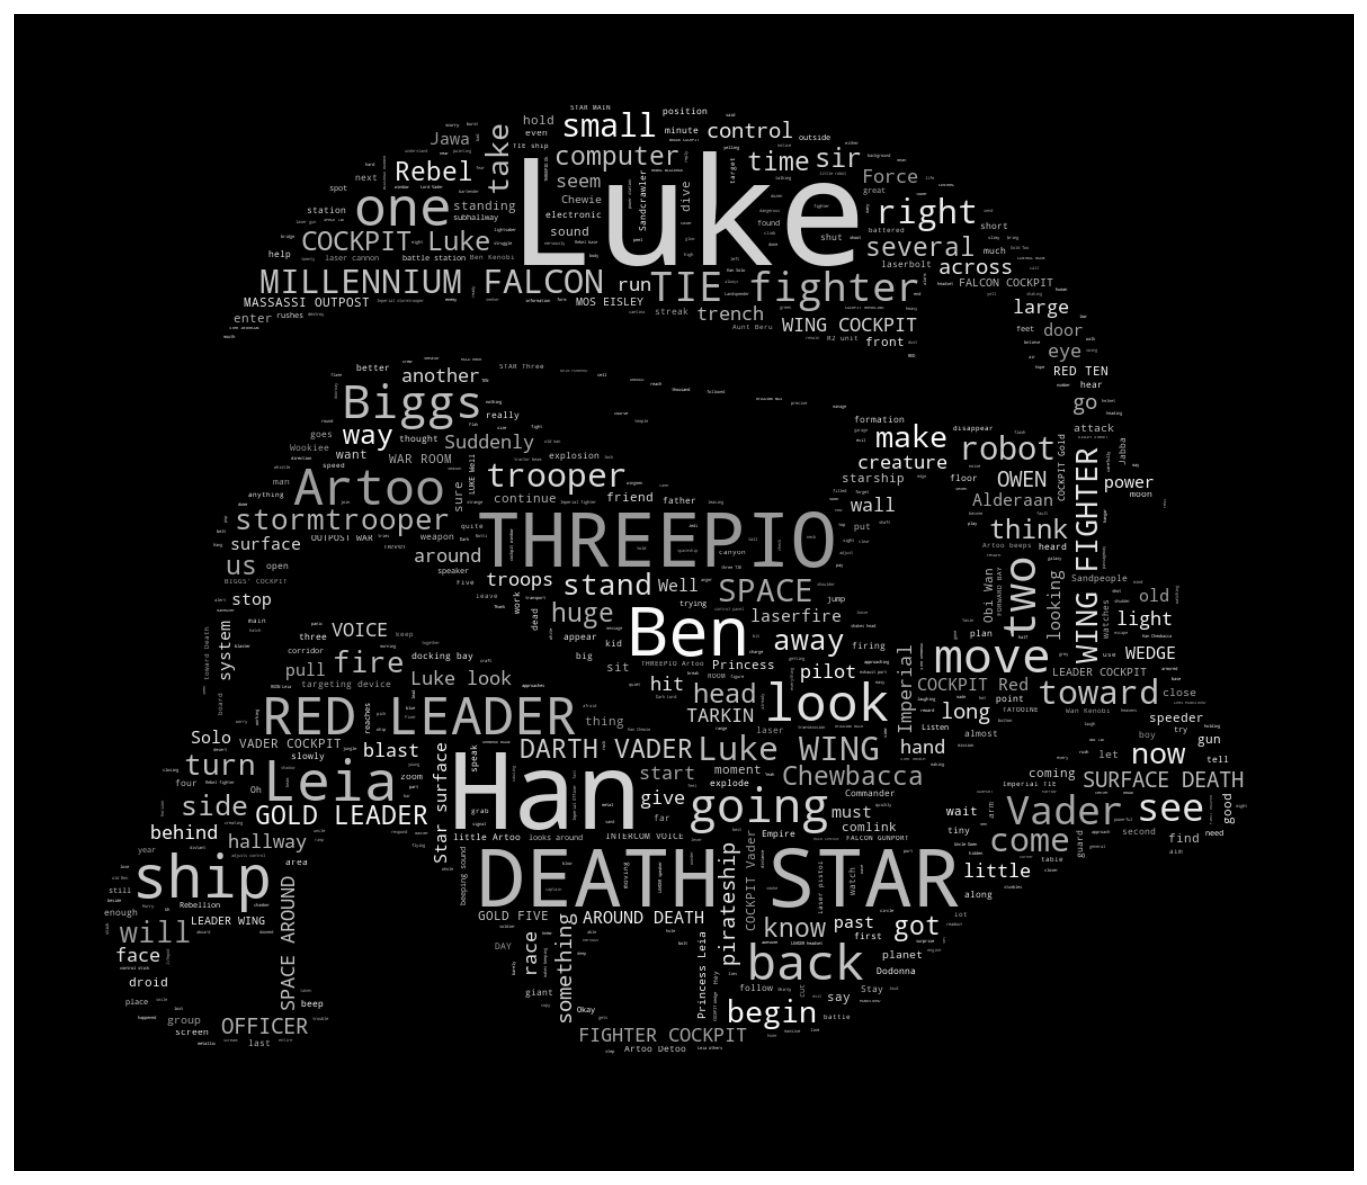

In [29]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation='bilinear')
plt.axis('off')
plt.show()

패턴이 대충이라도 보이시나요?

**자료를 가져오고 -> 불용어를 처리 -> 워드클라우드 안에 담아주고 -> 시각화** 이런 식으로 흘러가고 있습니다.

## 육아휴직 관련 법안에 대한 분석

KoNLPy가 내장하고 있는 법률 문서 중 하나를 가지고 기초적인 분석을 해보는 튜토리얼이에요. 매우 간단합니다.

In [30]:
import nltk
from konlpy.corpus import kobill
files_ko = kobill.fileids()
# konlpy의 내부문서 중 육아휴직 관련 법안 제 1809890호 읽기
doc_ko = kobill.open('1809890.txt').read()

In [31]:
doc_ko

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

웹크롤링으로 긁어오면 보시는 바와 같이 한글이 정돈되지 않고 \n이 난무하는 경우가 많습니다. 그래서 이를 잘 처리해주시는 것이 필요해요.

아까 배웠던 okt 모듈로 명사를 분석해보겠습니다.

### Okt로 명사 분석

In [32]:
from konlpy.tag import Okt
okt = Okt()
tokens_ko = okt.nouns(doc_ko)
tokens_ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '정의화',
 '의원',
 '대표',
 '발의',
 '의',
 '안',
 '번',
 '호',
 '발의',
 '연월일',
 '발',
 '의',
 '자',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '만',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '만',
 '세',
 '이하',
 '개정',
 '것임',
 '안',
 '제',
 '항제',
 '호',
 '법률',
 '제',
 '호',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '안',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '호',
 '중',
 '만',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '만',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '의',
 '자녀',
 '로',
 '부',
 '칙',
 '이',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '안',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '

- 문자열 단위를 토큰(token)이라고 하고 이렇게 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라고 하고
- 문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 합니다.

이 내용을 머리에 담아두고 코드를 읽어보면 코드의 흐름이 더 잘 읽힐겁니다

In [33]:
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')
print(len(ko.tokens)) # 수집된 토큰(단어)의 횟수
print(len(set(ko.tokens))) # 수집된 단어 중 고유한(unique) 토큰의 횟수
ko.vocab()

735
250


FreqDist({'가능': 4,
          '가정': 7,
          '각': 1,
          '값': 2,
          '개': 1,
          '개정': 8,
          '개정안': 3,
          '거나': 1,
          '것': 6,
          '것임': 2,
          '경비': 1,
          '경우': 16,
          '고': 1,
          '고용': 14,
          '고용노동부': 3,
          '곧': 1,
          '공무원': 10,
          '공포': 1,
          '관': 2,
          '관련': 2,
          '교육': 4,
          '구조': 1,
          '국가': 2,
          '국가공무원': 2,
          '국회예산정책처': 2,
          '규정': 1,
          '규칙': 1,
          '근거': 1,
          '근로자': 3,
          '급여': 8,
          '기': 1,
          '기간': 1,
          '기업체': 1,
          '기자': 1,
          '김': 1,
          '김을동': 1,
          '김정훈': 1,
          '김학송': 1,
          '나이': 2,
          '날': 1,
          '남녀': 1,
          '내용': 1,
          '논의': 1,
          '느': 1,
          '다만': 1,
          '다시': 1,
          '다음': 5,
          '단서': 1,
          '단위': 1,
          '달': 1,
          '대비': 1,
          '대상': 2,
   

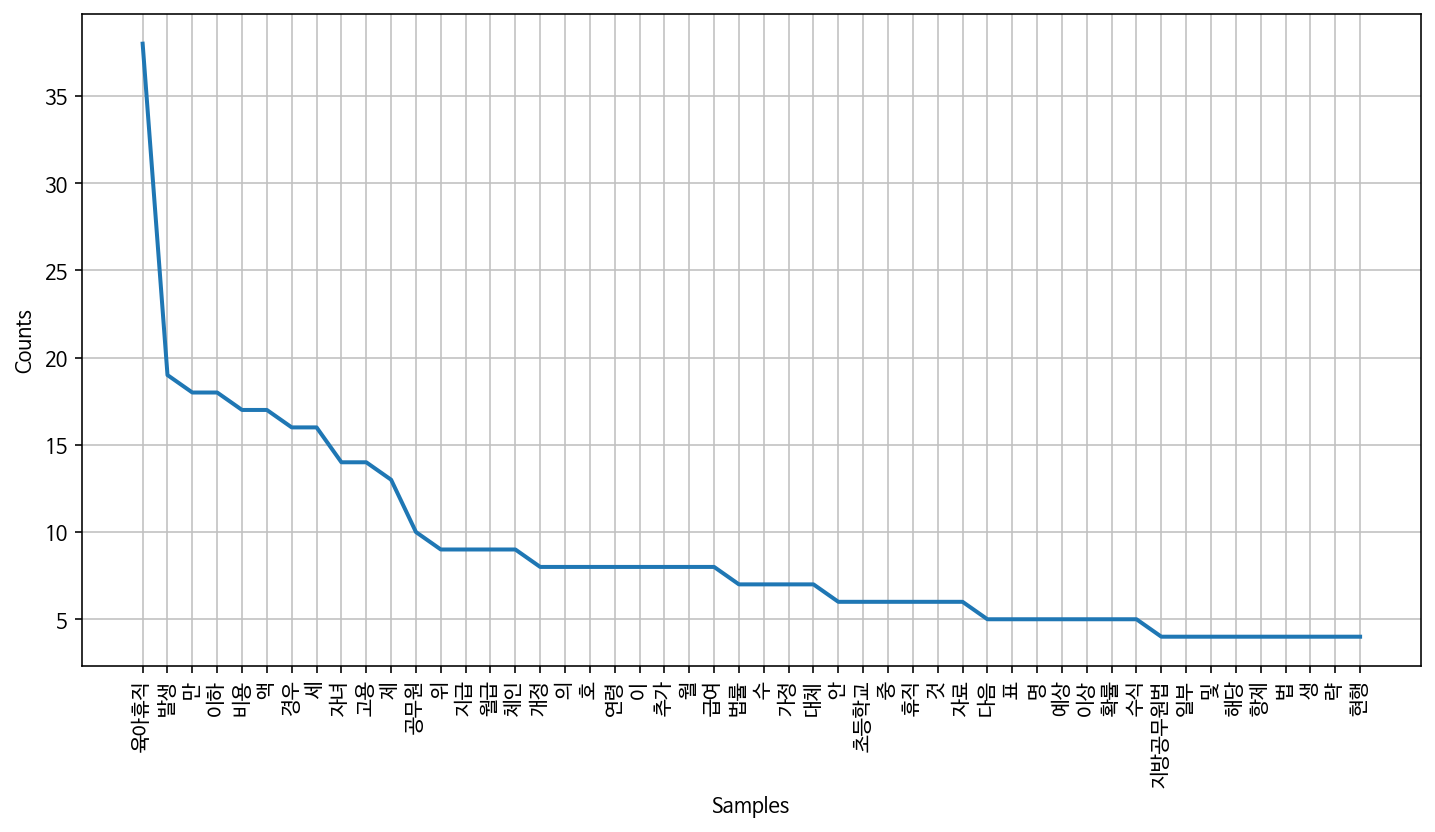

In [34]:
plt.figure(figsize=(12,6))
ko.plot(50) # 상위 50 토큰를 정렬하여 보여줌 
plt.show()

육아휴직이라는 단어가 많이 등장하고, 만, 액, 세 등과 같은 불용어도 많이 보입니다. 그래서 하나씩 불용어를 직접 제거해줘야겠죠? 단어 리스트를 보고 본인이 직접 불용어라고 생각하는 것들을 넣어서 제거해주면 됩니다. wordcloud를 시각화하는 것은 이렇게 품이 많이 들어가는 일이에요.

In [35]:
stop_words = ['.','(',')',',',"'",'%','-','X',').',
              'x','의','자','에','안','번','호','을','이','다','만','로','가','를']
ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['지방공무원법',
 '일부',
 '개정',
 '법률',
 '정의화',
 '의원',
 '대표',
 '발의',
 '발의',
 '연월일',
 '발',
 '정의화',
 '이명수',
 '김을동',
 '이사철',
 '여상규',
 '안규백',
 '황영철',
 '박영아',
 '김정훈',
 '김학송',
 '의원',
 '인',
 '제안',
 '이유',
 '및',
 '내용',
 '초등학교',
 '저학년',
 '경우',
 '부모',
 '사랑',
 '필요',
 '나이',
 '현재',
 '공무원',
 '자녀',
 '양육',
 '위',
 '육아휴직',
 '수',
 '자녀',
 '나이',
 '세',
 '이하',
 '초등학교',
 '저학년',
 '자녀',
 '위',
 '해당',
 '부모님',
 '일자리',
 '곧',
 '출산',
 '의욕',
 '저하',
 '문제',
 '수',
 '것임',
 '따라서',
 '육아휴직',
 '자녀',
 '연령',
 '세',
 '이하',
 '개정',
 '것임',
 '제',
 '항제',
 '법률',
 '제',
 '지방공무원법',
 '일부',
 '개정',
 '법률',
 '지방공무원법',
 '일부',
 '다음',
 '개정',
 '제',
 '항제',
 '중',
 '세',
 '이하',
 '초등학교',
 '취학',
 '전',
 '자녀',
 '세',
 '이하',
 '취학',
 '중인',
 '경우',
 '초등학교',
 '학년',
 '이하',
 '말',
 '자녀',
 '부',
 '칙',
 '법',
 '공포',
 '날',
 '시행',
 '신',
 '구조',
 '문대비',
 '표',
 '현',
 '행',
 '개',
 '정',
 '제',
 '휴직',
 '생',
 '략',
 '제',
 '휴직',
 '현행',
 '공무원',
 '다음',
 '각',
 '호의',
 '느',
 '하나',
 '해당',
 '사유',
 '직',
 '임용',
 '휴직',
 '명',
 '수',
 '다만',
 '제',
 '경우',
 '대통령령',
 '정',
 '사정',
 '직',
 '명',
 '생',
 '략',
 '현

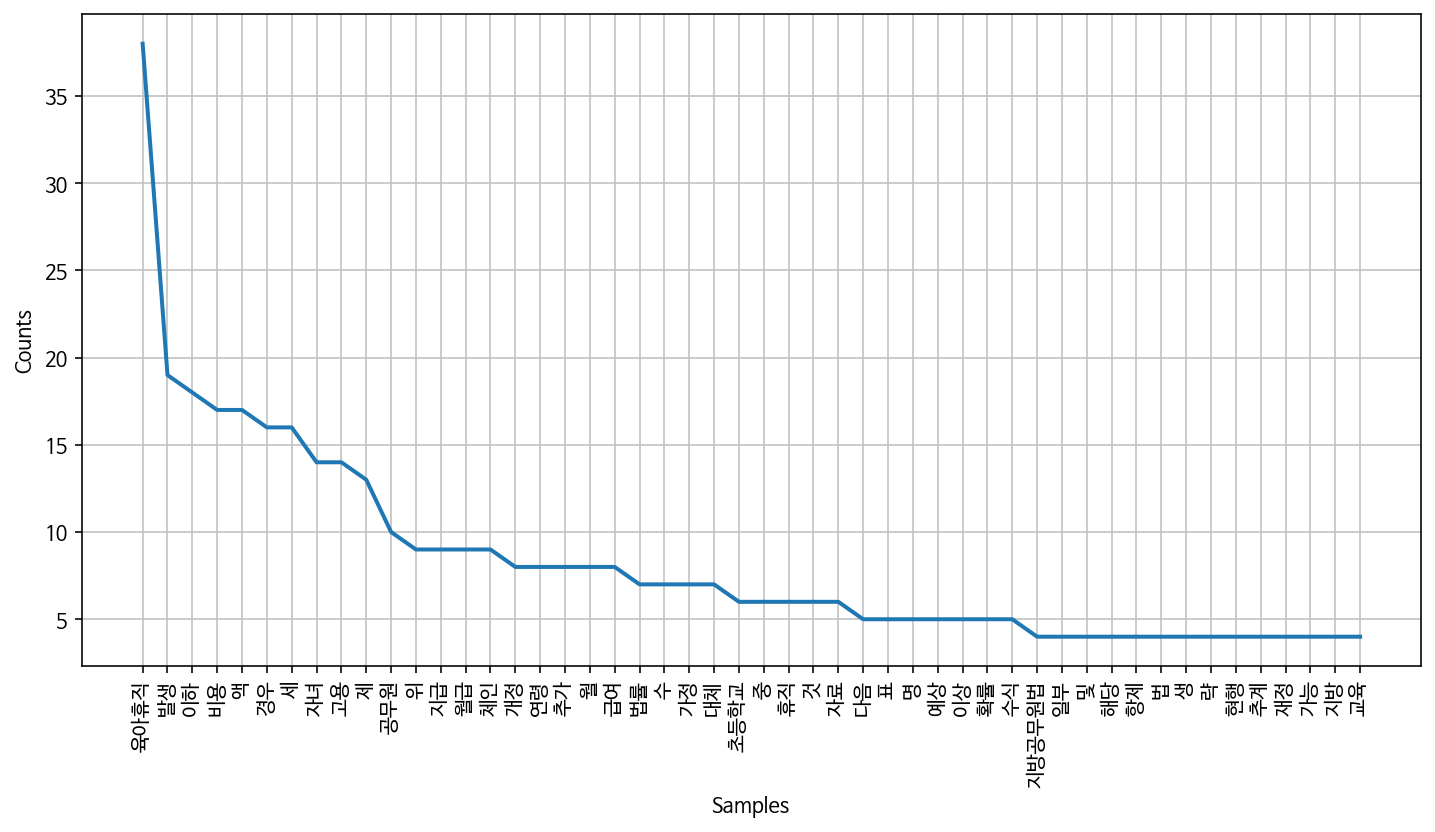

In [36]:
ko = nltk.Text(ko, name='대한민국 국회 의안 제 1809890호')

plt.figure(figsize=(12,6))
ko.plot(50)
plt.show()

In [37]:
# 특정 단어가 몇번 나왔는가? 
ko.count('초등학교')

6

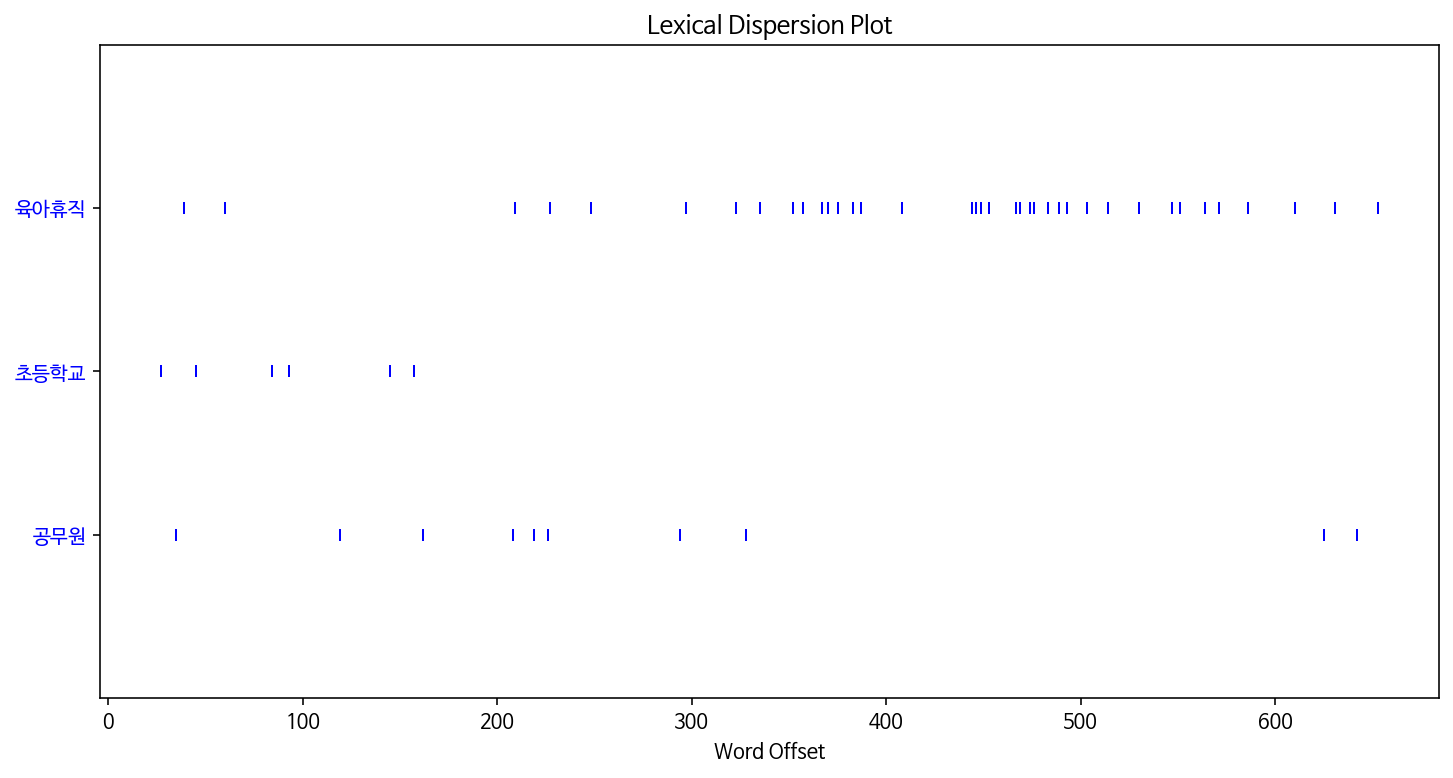

In [38]:
# 특정 단어들의 문서 내 위치를 개략적으로 분량과 함께 알 수 있음 
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원'])

In [39]:
# 원하는 단어와 그 주변부 단어까지 파악 가능
ko.concordance('초등학교')

Displaying 6 of 6 matches:
 안규백 황영철 박영아 김정훈 김학송 의원 인 제안 이유 및 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 위 육아
 나이 현재 공무원 자녀 양육 위 육아휴직 수 자녀 나이 세 이하 초등학교 저학년 자녀 위 해당 부모님 일자리 곧 출산 의욕 저하 문제 수 
일부 개정 법률 지방공무원법 일부 다음 개정 제 항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자
항제 중 세 이하 초등학교 취학 전 자녀 세 이하 취학 중인 경우 초등학교 학년 이하 말 자녀 부 칙 법 공포 날 시행 신 구조 문대비 표 
 수 다만 제 경우 대통령령 정 사정 직 명 생 략 현행 세 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 
 이하 초등학교 취 세 이하 취학 중인 경우 학 전 자녀 양육 위 초등학교 학년 이하 여 여자 공무원 말 자녀 임신 출산 때 생 략 생 략 


In [40]:
# 문서 내에서 연어(collocation)로 사용된 단어들도 파악가능
import nltk
nltk.download('stopwords')

ko.collocations()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
초등학교 저학년; 근로자 육아휴직; 육아휴직 대상자; 공무원 육아휴직


'초등학교'는 '저학년'과 / '근로자'는 '육아휴직'과 같이 쓰이고 있나보네요

In [41]:
data = ko.vocab().most_common(150)
data2 = dict(data)

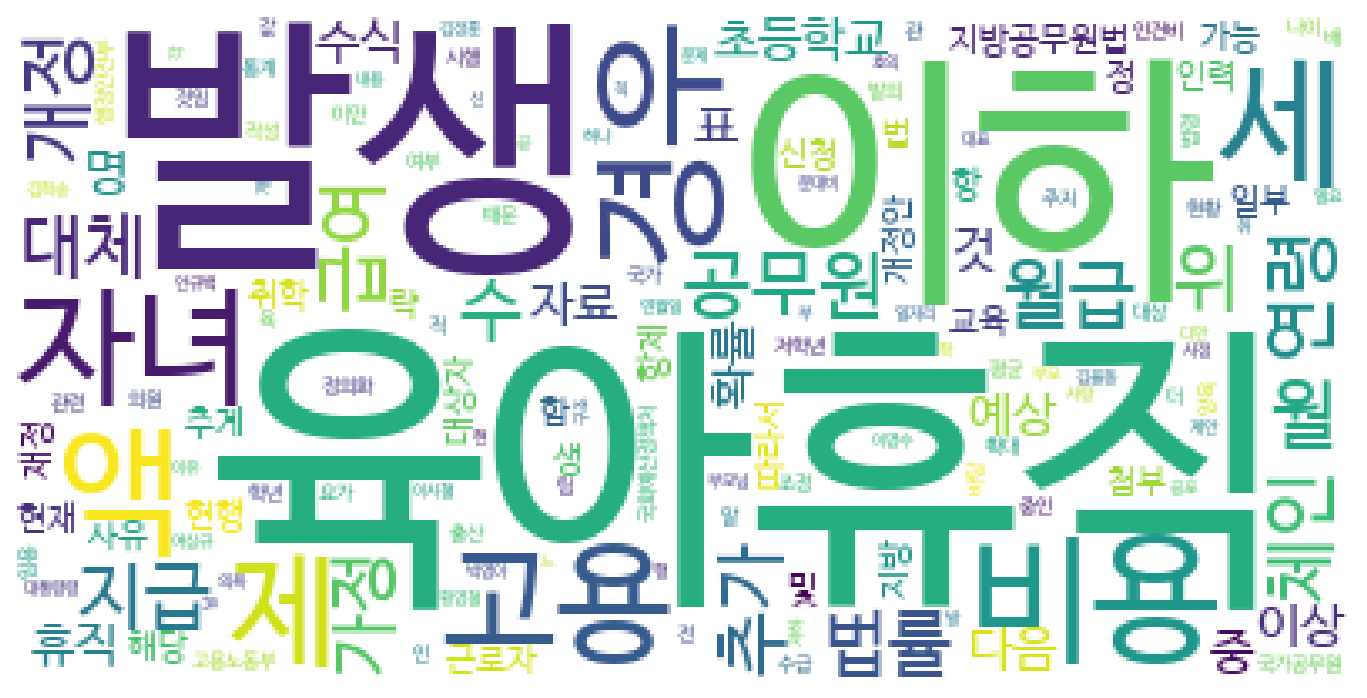

In [42]:
# for win : font_path='c:/Windows/Fonts/malgun.ttf'
# 나눔바른고딕 글씨체 있으면 가능, 없을 경우 font_path를 바꾸세요!
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
                      relative_scaling = 0.2,
                      background_color='white',).generate_from_frequencies(data2)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Naive Bayes Classifier의 이해 - 영문

지금부터는 머신러닝에 대해서 정말 사아알짝 맛만 보는 시간을 가져볼까합니다.

머신러닝에는 지도학습과 비지도학습이 있는데요, 이 나이브 베이즈 분류기는 지도학습에 속합니다. 컴퓨터를 학습시킬 때 데이터에 대한 레이블이 있기 때문에(정답이 있다!) '지도'(supervised)학습이라 부릅니다. 

[참고: 머신러닝 종류](https://www.playsw.or.kr/artificial/view/playswtv/672?currentTab=ai_data_video&path=artificial)

머신러닝은 기본적으로 어떠한 알고리즘을 만들기 위해 학습시킬 train data와 이 train data를 통해 학습한 알고리즘으로 새롭게 예측해볼 test data를 요구합니다. 여기에서도 train을 통해 알고리즘을 학습시키고 이를 새로운 test data를 넣어 예측해볼 겁니다.

In [43]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [44]:
# 연습용 데이터 train 
train = [('i like you','pos'),
         ('i hate you', 'neg'),
         ('you like me', 'neg'),
         ('i like her',' pos')]

train 변수 안에 있는 모든 단어들을 가져오는 코드를 작성하려고 하는데요. 그에 앞서서 중복되는 단어들을 제거하려고 해요. 저번 시간처럼 set을 활용해봅시다

In [45]:
for sentence in train: 
    for word in word_tokenize(sentence[0]): 
        print(word)

i
like
you
i
hate
you
you
like
me
i
like
her


In [46]:
all_words = set(word.lower() for sentence in train 
                for word in word_tokenize(sentence[0]))
all_words

{'hate', 'her', 'i', 'like', 'me', 'you'}

자~ 이제 모든 단어가 있는 말뭉치(all_words)가 만들어졌어요. 그럼 이 말뭉치를 기준으로 train의 각 문장에 어떤 단어가 있고 어떤 단어가 없는지 검사해보겠습니다

In [47]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
          for x in train]
t

[({'hate': False,
   'her': False,
   'i': True,
   'like': True,
   'me': False,
   'you': True},
  'pos'),
 ({'hate': True,
   'her': False,
   'i': True,
   'like': False,
   'me': False,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': False,
   'i': False,
   'like': True,
   'me': True,
   'you': True},
  'neg'),
 ({'hate': False,
   'her': True,
   'i': True,
   'like': True,
   'me': False,
   'you': False},
  ' pos')]

결과를 해석해보면 train의 첫번째 문장에는 hate가 없고, i는 있다는 뜻이에요. 코드가 조금 복잡해서 이해하기 어려울 수 있지만, 대충 무슨 의미인지 파악하기만 됩니다. 자세한건 이후 머신러닝 커리에서 배우면 돼요~ 이것을 활용해 나이브 베이즈 분류기를 동작시키겠습니다.

In [48]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                      me = False             pos : neg    =      1.5 : 1.0
                    hate = False             pos : neg    =      1.5 : 1.0
                    like = True              pos : neg    =      1.5 : 1.0
                       i = True              pos : neg    =      1.5 : 1.0
                     her = False             neg : pos    =      1.1 : 1.0
                     you = True              neg : pos    =      1.1 : 1.0


첫번째 문장 hate = False의 의미는 hate가 없을 때, 긍정일 확률이 1.5, 부정일 확률이 1이라는 의미입니다. train 데이터로 학습시켰으니 test 데이터(새로운 데이터)도 이에 기반해서 잘 예측할 수 있는지 확인해보겠습니다.

In [49]:
test_sentence = 'i like MeRui'
test_sent_features = {word.lower(): 
                      (word in word_tokenize(test_sentence.lower()))
                      for word in all_words}

test_sent_features

{'hate': False,
 'her': False,
 'i': True,
 'like': True,
 'me': False,
 'you': False}

In [50]:
classifier.classify(test_sent_features)

'pos'

test_sentence의 문장은 긍정을 나타내는 문장이라 잘 판단했네요. 분류기를 가동시킬 문장이 많으면 신뢰성있는 결론을 얻을 것이라 하는데요, 아주 간단하지만 잘 동작한다는 점에서 '나이브' 베이즈 분류기라고 할 수 있습니다.

## Naive Byes Classifier의 이해 - 한글

한글로도 하려면 형태소 분석을 거쳐야 해요. 형태소 분석을 거치지 않을 경우 어떻게 되는지부터 살펴봅시다.



In [51]:
from konlpy.tag import Okt
pos_tagger = Okt()

# 연습 데이터
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')]

In [52]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

{'고양이도',
 '고양이야',
 '난',
 '놀거야',
 '마치고',
 '메리가',
 '메리는',
 '메리랑',
 '수업이',
 '이쁜',
 '좋아',
 '지루해'}

형태소 분석을 하지 않으면 '고양이도'와 '고양이야'가 / '메리가', '메리는', '메리랑'이 각각 다르게 뽑히게 됩니다. 문장을 제대로 분석하려면 명사와 조사로 나뉘어서 뽑혀야 하는데 붙어서 나와버려요. 우선 이 상태에서 분석을 계속 진행해보겠습니다

In [53]:
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

[({'고양이도': False,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': True,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': True,
   '고양이야': False,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': False,
   '이쁜': False,
   '좋아': True,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': False,
   '메리랑': False,
   '수업이': True,
   '이쁜': False,
   '좋아': False,
   '지루해': True},
  'neg'),
 ({'고양이도': False,
   '고양이야': True,
   '난': False,
   '놀거야': False,
   '마치고': False,
   '메리가': False,
   '메리는': True,
   '메리랑': False,
   '수업이': False,
   '이쁜': True,
   '좋아': False,
   '지루해': False},
  'pos'),
 ({'고양이도': False,
   '고양이야': False,
   '난': True,
   '놀거야': True,
   '마치고': True,
   '메리가': False,
   '메리는': False,
   '메리랑': True,
   '수업이': False,
   '이쁜': 

In [54]:
# classifier에 검사내용을 넣어 일종의 예측 가이드라인을 만듭니다
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

Most Informative Features
                       난 = True              neg : pos    =      2.5 : 1.0
                      좋아 = False             neg : pos    =      1.5 : 1.0
                     마치고 = False             neg : pos    =      1.1 : 1.0
                     메리가 = False             neg : pos    =      1.1 : 1.0
                     메리랑 = False             neg : pos    =      1.1 : 1.0
                    고양이도 = False             neg : pos    =      1.1 : 1.0
                     놀거야 = False             neg : pos    =      1.1 : 1.0
                    고양이야 = False             neg : pos    =      1.1 : 1.0
                     메리는 = False             neg : pos    =      1.1 : 1.0
                      이쁜 = False             neg : pos    =      1.1 : 1.0


train 내용을 바탕으로 test 데이터를 넣어 분석해봅시다

In [55]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'
test_sent_features = {word.lower(): 
                      (word in word_tokenize(test_sentence.lower()))
                      for word in all_words}
test_sent_features

{'고양이도': False,
 '고양이야': False,
 '난': True,
 '놀거야': True,
 '마치고': False,
 '메리가': False,
 '메리는': False,
 '메리랑': True,
 '수업이': True,
 '이쁜': False,
 '좋아': False,
 '지루해': False}

In [56]:
classifier.classify(test_sent_features)

'neg'

이런! '난 수업이 마치면 메리랑 놀거야'라는 문장을 부정적인 문장이라고 분석했네요. 자, 이제 형태소 분석의 중요성을 잘 아셨을겁니다

In [57]:
def tokenize(doc): 
    return ['/'.join(t) for t in pos_tagger.pos(doc, norm=True, stem=True)]

konlpy를 만든 Lucy Park에 따르면 위의 함수처럼 태그를 붙여주는 것이 유리하다고 해요. tokenize 함수를 사용해서 train 문장을 형태소 분석해보겠습니다.

In [58]:
train = [('메리가 좋아', 'pos'), 
         ('고양이도 좋아', 'pos'),
         ('난 수업이 지루해', 'neg'),
         ('메리는 이쁜 고양이야', 'pos'),
         ('난 마치고 메리랑 놀거야', 'pos')] 

train_docs = [(tokenize(row[0]), row[1]) for row in train]
train_docs

[(['메리/Noun', '가/Josa', '좋다/Adjective'], 'pos'),
 (['고양이/Noun', '도/Josa', '좋다/Adjective'], 'pos'),
 (['난/Noun', '수업/Noun', '이/Josa', '지루하다/Adjective'], 'neg'),
 (['메리/Noun', '는/Josa', '이쁘다/Adjective', '고양이/Noun', '야/Josa'], 'pos'),
 (['난/Noun', '마치/Noun', '고/Josa', '메리/Noun', '랑/Josa', '놀다/Verb'], 'pos')]

In [59]:
# 이 코드를 아래 코드에서는 한 줄로 적어준 겁니다!
for d in train_docs: 
    for t in d[0]: 
        print(t)

메리/Noun
가/Josa
좋다/Adjective
고양이/Noun
도/Josa
좋다/Adjective
난/Noun
수업/Noun
이/Josa
지루하다/Adjective
메리/Noun
는/Josa
이쁘다/Adjective
고양이/Noun
야/Josa
난/Noun
마치/Noun
고/Josa
메리/Noun
랑/Josa
놀다/Verb


In [60]:
tokens = [t for d in train_docs for t in d[0]]
tokens

['메리/Noun',
 '가/Josa',
 '좋다/Adjective',
 '고양이/Noun',
 '도/Josa',
 '좋다/Adjective',
 '난/Noun',
 '수업/Noun',
 '이/Josa',
 '지루하다/Adjective',
 '메리/Noun',
 '는/Josa',
 '이쁘다/Adjective',
 '고양이/Noun',
 '야/Josa',
 '난/Noun',
 '마치/Noun',
 '고/Josa',
 '메리/Noun',
 '랑/Josa',
 '놀다/Verb']

이렇게 전체 말뭉치(tokens)를 만들었습니다. 아래 함수는 해당 문장에 있는 형태소가 tokens 안에 들어있는지 확인하는 것이에요

In [61]:
def term_exists(doc): 
    return {word: (word in set(doc)) for word in tokens}

In [62]:
train_xy = [(term_exists(d), c) for d,c in train_docs]
train_xy

[({'가/Josa': True,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': True,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': True,
   '난/Noun': False,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': True,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': False,
   '야/Josa': False,
   '이/Josa': False,
   '이쁘다/Adjective': False,
   '좋다/Adjective': True,
   '지루하다/Adjective': False},
  'pos'),
 ({'가/Josa': False,
   '고/Josa': False,
   '고양이/Noun': False,
   '난/Noun': True,
   '놀다/Verb': False,
   '는/Josa': False,
   '도/Josa': False,
   '랑/Josa': False,
   '마치/Noun': False,
   '메리/Noun': False,
   '수업/Noun': True,
   '야/Josa': False,
   '이/Josa': True,
   '이쁘다/Adjective': False,


변수명이 위에서는 all_words였다가 이번에는 tokens로, t에서 train_xy로 바뀌었을 뿐 원리는 똑같습니다

In [63]:
classifier = nltk.NaiveBayesClassifier.train(train_xy)

In [64]:
test_sentence = [('난 수업이 마치면 코사다마랑 놀거야')]

# 똑같이 형태소 분석 
test_docs = pos_tagger.pos(test_sentence[0])
test_docs

[('난', 'Noun'),
 ('수업', 'Noun'),
 ('이', 'Josa'),
 ('마치', 'Noun'),
 ('면', 'Josa'),
 ('코', 'Noun'),
 ('사', 'Modifier'),
 ('다마', 'Noun'),
 ('랑', 'Josa'),
 ('놀거야', 'Verb')]

In [65]:
test_sent_features = {word: (word in tokens) for word in test_docs}
test_sent_features

{('난', 'Noun'): False,
 ('놀거야', 'Verb'): False,
 ('다마', 'Noun'): False,
 ('랑', 'Josa'): False,
 ('마치', 'Noun'): False,
 ('면', 'Josa'): False,
 ('사', 'Modifier'): False,
 ('수업', 'Noun'): False,
 ('이', 'Josa'): False,
 ('코', 'Noun'): False}

In [66]:
classifier.classify(test_sent_features)

'pos'

와우 🙊 이젠 긍정으로 잘 분석되었네요

## 문장의 유사도 측정하기

많은 문장 혹은 문서들 중에서 유사한 문장을 찾아내는 방법입니다. 어떤 문장을 벡터로 표현할 수 있으면 벡터 간 거리를 구하는 방법으로 문장 간 유사도를 측정할 수 있습니다.

In [67]:
# 텍스트의 특징을 추출하는 모듈
from sklearn.feature_extraction.text import CountVectorizer 

In [68]:
# min_df: 특정 단어가 min_df보다 적은 빈도수가지면 그 단어 피처 제외 
vectorizer = CountVectorizer(min_df = 1)

In [69]:
# 유사한 문장을 연습용으로 사용해보기
# feat. 맞춤법 어떻하죠? 
contents = ['메리랑 놀러가고 싶지만 바쁜데 어떻하죠?',
            '메리는 공원에서 산책하고 노는 것을 싫어해요',
            '메리는 공원에서 노는 것도 싫어해요. 이상해요.',
            '먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요']

In [70]:
X = vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

어떻게 벡터화되는지는 교재 316쪽의 그림 8-19를 꼭 보고 이해해보기! 이렇게 벡터화하면 '메리는'과 '메리랑'을 다르게 생각되므로 더 한글 문장에 맞춰서 진행해봅시다.

In [71]:
from konlpy.tag import Okt 
okt = Okt()

In [72]:
contents_tokens = [okt.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요', '.'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

'메리는'과 '메리랑'이 '메리','는','메리','랑'으로 잘 나눠집니다. 형태소 분석한 것을 하나의 문장으로 담을거에요. 대신, 각각의 형태소별로 띄어쓰기를 하여 sciket learn의 vectorizer 함수에서 사용하기 편하게 편집할겁니다

In [74]:
contents_for_vectorize = []

for content in contents_tokens:
  sentence =''
  for word in content: 
    sentence = sentence + ' ' + word 

  contents_for_vectorize.append(sentence)

contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요 .',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [75]:
X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape 
num_samples, num_features

(4, 20)

In [76]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

말뭉치가 잘 형성되었네요! 1개 이하로 나오는 것은 말뭉치에 왜 넣지 않은지는 앞서 객체 생성할 때 min_df 파라미터를 1로 설정해주었기 때문이에요. 이 리스트를 numpy의 array 형식으로 바꾸어주고, 행과 열을 바꿔서 표시해주려고 합니다. 결과는 318쪽 그림 8-21에 있어요. 

In [77]:
X.toarray().transpose()

array([[1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 1]])

그럼 이렇게 학습 데이터를 기반으로 말뭉치를 잘 만들어주었으니, 테스트 데이터를 넣어봐야겠지요. 새로운 문장을 동일하게 벡터화해서 각 벡터들 사이의 거리를 구하면 문장 간의 유사도를 측정할 수 있다는 개념이에요.

In [78]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_tokens = [okt.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens:
  sentence =''
  for word in content: 
    sentence = sentence + ' ' + word

  new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

벡터화하기 쉽도록 문장을 잘 가공해주었고, 벡터화를 시켜주면 됩니다. 

In [79]:
new_post_vec = vectorizer.transform(new_post_for_vectorize)
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

## 유클리드 거리 유사도

자! 그럼 이 상태에서 어떻게 유사도 측정을 하느냐? 크게 두가지 방법이 있는 것 같습니다. 하나는 거리 차이를 이용하는 방법, 다른 하나는 각도 차이를 이용하는 방법이 있어요. 여기에서는 거리 차이를 이용해서 측정하는 방법을 사용하는데요, 정확히는 유클리드 거리 유사도를 사용하여 문장 간의 유사도를 측정해보는 방법입니다. 거리를 기반으로 하면, 특정 좌표 주변과 가까이에 있는 것이 유사도가 높다고 판단하는 것이죠.

![image.png](https://d1z1a3q7uy2q8k.cloudfront.net/blog_images/image_5394346701474615621316.png)

출처: https://d1z1a3q7uy2q8k.cloudfront.net/blog_images/image_5394346701474615621316.png, https://specialscene.tistory.com/48

벡터 a의 길이는 놈(norm)으로 정의하는데요, 이를 구현해주는 코드가 np.linalg.norm()이라고 러프하게 이해하시면 될 듯 합니다.

참고: [벡터의 길이](https://datascienceschool.net/view-notebook/dd1680bfbaab414a8d54dc978c6e883a/)


In [80]:
import scipy as sp 

def dist_raw(v1, v2):
  delta = v1 - v2 
  return sp.linalg.norm(delta.toarray())

In [81]:
best_doc = None
# 65535가 무슨 의미인지는 모르겠네요... 
best_dist = 65535 
best_i = None 

for i in range(0, num_samples):
  post_vec = X.getrow(i)
  d = dist_raw(post_vec, new_post_vec)

  # i는 문장 번호, d는 유사도
  print('== Post %i with dist=%.2f    : %s' % (i,d,contents[i]))

# best_dist가 계속 낮게 수정되는 것! (낮을수록 유사도 높음)
  if d < best_dist: 
    best_dist = d
    best_i = i

== Post 0 with dist=3.00    : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=1.00    : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=2.00    : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=3.46    : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [82]:
print('Best post is %i, dist = %.2f' % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


가장 유사도가 높은 문장이 바로 '메리는 공원에서 산책하고 노는 것을 싫어해요'라는 문장이네요! 의미는 반대나 조합이 비슷해서 유사도를 높게 측정한 듯 합니다.

In [83]:
# contents와 새로운 문장이 벡터화된 결과 

for i in range(0, len(contents)):
  # 벡터화한 것의 row만 가져와봐라
  print(X.getrow(i).toarray())

print('------------------')
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


위의 벡터를 가지고 다시 거리 구하기


In [84]:
def dist_norm(v1, v2): 
  v1_normalized = v1 / sp.linalg.norm(v1.toarray())
  v2_normalized = v2 / sp.linalg.norm(v2.toarray())

  delta = v1_normalized - v2_normalized 

  return sp.linalg.norm(delta.toarray())

In [85]:
best_doc = None 
best_dist = 65535
best_i = None 

for i in range(0, num_samples): 
  # 앞에서 array로 바꿔줬으니 다시 array로 바꿔줄필요 없음 
  post_vec = X.getrow(i)
  d = dist_norm(post_vec, new_post_vec)

  print("== Post %i with dist=%2f   : %s" % (i,d,contents[i]))

  if d < best_dist: 
    best_dist = d
    best_i = i 

== Post 0 with dist=1.278613   : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== Post 1 with dist=0.417442   : 메리는 공원에서 산책하고 노는 것을 싫어해요
== Post 2 with dist=0.894427   : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== Post 3 with dist=1.304553   : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [86]:
print('Best post is %i, dist = %.2f' % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

Best post is 1, dist = 0.42
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


### TF-IDF

tf(term frequency)와 idf(inverse document frequency)는 텍스트 마이닝에서 사용하는 일종의 단어별로 부과하는 가중치입니다. tf는 어떤 단어가 문서 내에서 자주 등장할수록 중요도가 높을 것으로 보는 것이고, idf는 비교하는 모든 문서에 만약 같은 단어가 있다면 이 단어는 핵심 어휘일지는 모르지만 문서 간의 비교에서는 중요한 단어가 아니라는 뜻으로 보는 것이에요. 교재 322쪽에서는 직접 함수를 만들어 예제에 적용해본 결과가 있지만, (이해가 중요할 수도 있겠지만) 이것의 의미를 알고 일단 우리는 적용해서 해석할 수 있기만 하면 돼요! 우리가 사용할 것은 **TF-IDF 기반의 벡터화**이고, 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 주는 방식으로 값을 부여한다고 보면 됩니다.

정독해보기 [TF-IDF의 개념](https://charsyam.wordpress.com/2017/04/08/%EC%9A%A9%EC%96%B4-%EC%A0%95%EB%A6%AC-%EC%9E%85-%EA%B0%9C%EB%B0%9C%EC%9E%90%EB%A5%BC-%EC%9C%84%ED%95%9C-tf-idf/)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# decode_error은 디코딩 에러 무시한다는 말! 
vectorizer = TfidfVectorizer(min_df=1, decode_error='ignore')

contents_tokens = [okt.morphs(row) for row in contents]

contents_for_vectorize = []

for content in contents_tokens: 
  sentence = ''
  for word in content: 
    sentence = sentence + ' ' + word 

  contents_for_vectorize.append(sentence)

X = vectorizer.fit_transform(contents_for_vectorize)
num_samples, num_features = X.shape 
num_samples, num_features

(4, 20)

In [88]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

말뭉치들이 잘 생성되었네요. 그러면 새로운 문장으로 다시 테스트 해봅시다.

In [89]:
new_post = ['근처 공원에 메리랑 놀러가고 싶네요.']
new_post_tokens = [okt.morphs(row) for row in new_post]

new_post_for_vectorize = []

for content in new_post_tokens: 
  sentence = ''
  for word in content: 
    sentence = sentence + ' ' + word 

  new_post_for_vectorize.append(sentence)

new_post_for_vectorize

[' 근처 공원 에 메리 랑 놀러 가고 싶네요 .']

형태소 분석이 잘 되었구요, 이를 벡터화하여 새롭게 유사도를 측정해봅시다.

In [90]:
best_doc = None 
best_dist = 65535
best_i = None 

for i in range(0, num_samples): 
  post_vec = X.getrow(i)
  d = dist_norm(post_vec, new_post_vec)

  print("== post %i with dist=%.2f    : %s" % (i,d,contents[i]))

  if d < best_dist: 
    best_dist = d
    best_i = i 

print("Best post is %i, dist = %.2f" % (best_i, best_dist))
print('-->', new_post)
print('---->', contents[best_i])

== post 0 with dist=1.32    : 메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
== post 1 with dist=0.43    : 메리는 공원에서 산책하고 노는 것을 싫어해요
== post 2 with dist=0.95    : 메리는 공원에서 노는 것도 싫어해요. 이상해요.
== post 3 with dist=1.33    : 먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 1, dist = 0.43
--> ['근처 공원에 메리랑 놀러가고 싶네요.']
----> 메리는 공원에서 산책하고 노는 것을 싫어해요


이런 방식으로 벡터화를 해도 마찬가지로 '메리는 공원에서 산책하고 노는 것을 싫어해요'가 가장 높은 유사성을 보이네요^^

이렇게 해서 자연어 처리 입문 전반부 학습이 완료되었습니다. 내용이 상당히 많죠?ㅎㅎ 다음 교안에서는 청와대 청원 크롤링 & 분석 프로젝트를 통해 실제로 활용하는 법을 익힐겁니다. 그럼 다음 교안에서 또 봐요~👨‍💻
